<a href="https://colab.research.google.com/github/arofenitra/stochastic-methods-of-AI-and-Modelling/blob/main/assignment/Stochastic_Methods_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 1. Multivariate Gaussian Distributions (2 points)

Assuming that the joint PDF of two random variables $x$ and $y$ reads $P(x,y)=\frac{1}{N}\exp{(−x^2−y^2−xy)}$. Compute:
- (a) Normalisation constant $N$ ,
- (b) marginal PDF $P(x)$,
- (c) find the conditional probability $P(x|y)$ and
- (d) the averages $⟨x^2y^2⟩,⟨xy^3⟩$

### Answer to Problem 1.

Let $P(x,y)$ be the joint PDF of two random variables $x$ and $y$, $P(x,y)=\frac{1}{N}\exp{(−x^2−y^2−xy)}$. For some matrix $A$, We can write $P(x,y)$ as:  
 $$P(x,y)=\frac{1}{N}\exp{\left(-\frac{1}{2}\left(\begin{matrix}x&y\end{matrix}\right)A\left(\begin{matrix}x\\y\end{matrix}\right)\right)} \; , \; A=\left(\begin{matrix}a_{11}&a_{12}\\a_{21}&a_{22}\end{matrix}\right)$$
$$⇒a_{11}x^2+(a_{12}+a_{21})xy+a_{22}y^2=2x^2+2xy+2y^2$$
$$⇒ A=\left(\begin{matrix}2&1\\1&2\end{matrix}\right)\; ,\; \det(A)=3$$

- (a) The normalisation constant $N$ satisfy:  
$$N=\frac{(2\pi)^{(2/2)}}{\sqrt{\det(A)}}=\frac{2\pi}{\sqrt{3}}$$
Hence $P(x,y)=\frac{\sqrt{3}}{2\pi}\exp{(-x^2-xy-y^2)}$

- (b) marginal PDF $P(x)$.  
$$P(x)=\displaystyle \int_{-\infty}^\infty P(x,y)dy= \frac{\sqrt{3}}{2\pi}\int_{-\infty}^\infty \exp{(-(y+x/2)^2+x^2/4-x^2)}dy=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\int_{-\infty}^\infty \exp{(-(y+x/2)^2)}dy=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\sqrt{\pi}=\frac{\sqrt{3}}{2\pi}\exp{(-\frac{3}{4}x^2)}\int_{-\infty}^\infty \exp{(-(y+x/2)^2)}dy=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}x^2)}$$
$$P(x)=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}x^2)}$$

- (c) The conditional probability $P(x|y)$  
From the symmetricity of the above matrix $A$, we have that $P(y)=\frac{\sqrt{3}}{2\sqrt{\pi}}\exp{(-\frac{3}{4}y^2)}$
$$P(x|y)=\frac{P(x,y)}{P(y)}=\frac{\sqrt{3}}{2\pi}\frac{2\sqrt{\pi}}{\sqrt{3}}\frac{\exp{(-x^2-xy-y^2)}}{\exp{(-3/4y^2)}}=\frac{1}{\sqrt{\pi}}\exp{(-x^2-xy-y^2/4)}$$

- The averages $⟨x^2y^2⟩,⟨xy^3⟩$.   
$$⟨x^2y^2⟩=\int_{\mathbb{R}}dx\int_{\mathbb{R}}dy(x^2y^2P(x,y))=\frac{\sqrt{3}}{2\pi}\int_{\mathbb{R}}dx\int_{\mathbb{R}}x^2y^2\exp{(-x^2-xy-y^2)dy}$$

$$⟨xy^3⟩=\int_{\mathbb{R}}dx\int_{\mathbb{R}}dy(xy^3P(x,y))=\frac{\sqrt{3}}{2\pi}\int_{\mathbb{R}}dx\int_{\mathbb{R}}xy^3\exp{(-x^2-xy-y^2)dy}$$

However, we can compute it using Wick;s Isserlis' theorem.

$$A=\left(\begin{matrix}2&1\\1&2 \end{matrix} \right);A^{-1}=\left(\begin{matrix}\frac{2}{3}&-\frac{1}{3}\\-\frac{1}{3}&\frac{2}{3}\end{matrix} \right) ⇒ \mathbb{E}[x,y]=\mathbb{E}[y,x]=-\frac{1}{3} ; \mathbb{E}[x,x]=\mathbb{E}[y,y]=\frac{2}{3}$$
$\mathbb{E}[x^2y^2]=\mathbb{E}[x,x]\mathbb{E}[y,y]+2\mathbb{E}[x,y]^2=\frac{2}{3}$  
$\mathbb{E}[xy^3]=3\mathbb{E}[x,y]\mathbb{E}[y,y]=-\frac{2}{3}$


### Problem 2. Eigenvalue distributions for Random Matrices (3 points)

Random matrix theory is applied towards a diverse set of systems ranging from physics of heavy nuclei and disordered systems to optimal control theory and deep learning. A random matrix is any matrix with random numbers as elements.   In this problem you will reproduces some of the well-known classical results for Gaussian orthogonal ensemble (GOE) matrices. These matrices are symmetric and can be generated by producing the corresponding element values from $N(0, 1)$ distribution.  

- **Wigner semi-circle**. Plot the spectrum of the eigenvalues of GOE matrix N ×N with N = 5000.
Check that your histogram can be well approximated by a semi-circle.
- **Wigner’s surmise**. Using the same matrix you generated in the previous step check the
distribution of spacing between consecutive eigenvalues. Plot the function $\frac{πs}{2}\exp{(−πs^2/4)}$ on top of the histogram (where $s$ is the spacing distance)
- **Tracy-Widom**. Plot the largest eigenvalues of 1000 of 1000 × 1000 GOE matrices. Add the
analytical curve for the Tracy-Widom distribution on top of the results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Generate a GOE matrix
N = 5000
A = np.random.randn(N, N)
A = (A + A.T) / 2  # Ensure symmetry

# Compute eigenvalues
eigenvalues = np.linalg.eigvalsh(A)


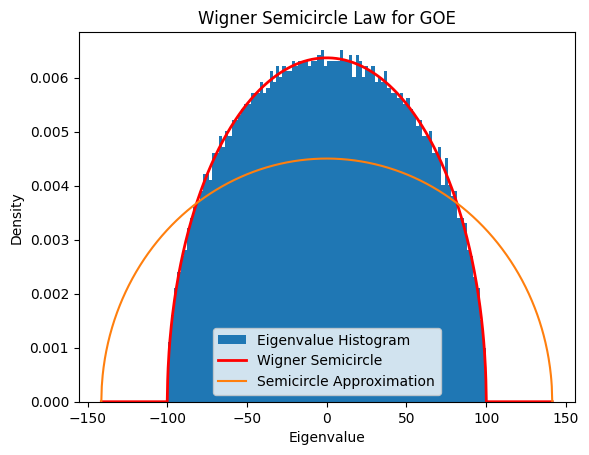

In [ ]:

# Plot the histogram of eigenvalues
plt.hist(eigenvalues, bins=100, density=True, label='Eigenvalue Histogram')

# Plot the Wigner semicircle distribution
x = np.linspace(-np.sqrt(4*N), np.sqrt(4*N), 1000)
y = sp.stats.semicircular.pdf(x, scale=np.sqrt(2*N))
plt.plot(x, y, 'r-', lw=2, label='Wigner Semicircle')


# Calculate the semicircle approximation
R = 2 * np.sqrt(N)
x = np.linspace(-R, R, 1000)
y = (2 / (np.pi * R**2)) * np.sqrt(R**2 - x**2)

# Plot the semicircle approximation
plt.plot(x, y, label='Semicircle Approximation')


plt.xlabel('Eigenvalue')
plt.ylabel('Density')
plt.title('Wigner Semicircle Law for GOE')
plt.legend()
plt.show()

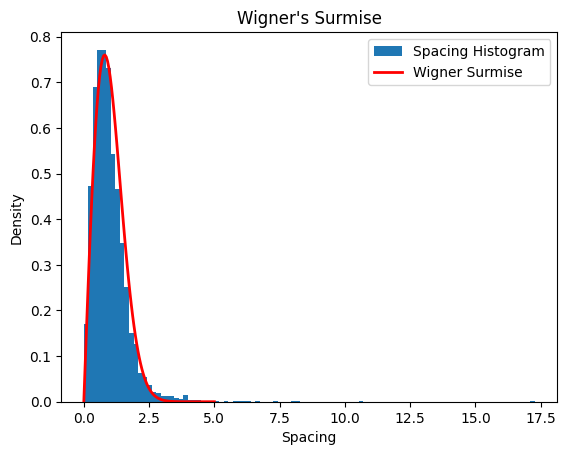

In [ ]:
# Calculate spacings
spacings = np.diff(np.sort(eigenvalues))

# Normalize spacings
mean_spacing = np.mean(spacings)
normalized_spacings = spacings / mean_spacing

# Plot the histogram of spacings
plt.hist(normalized_spacings, bins=100, density=True, label='Spacing Histogram')

# Plot the Wigner surmise
x = np.linspace(0, 5, 100)
y = (np.pi / 2) * x * np.exp(-np.pi * x**2 / 4)
plt.plot(x, y, 'r-', lw=2, label='Wigner Surmise')

plt.xlabel('Spacing')
plt.ylabel('Density')
plt.title("Wigner's Surmise")
plt.legend()
plt.show()

In [ ]:
# Function to generate GOE matrices and extract largest eigenvalues
def generate_largest_eigenvalues(num_matrices, N):
    largest_eigenvalues = []
    for _ in range(num_matrices):
        A = np.random.randn(N, N)
        A = (A + A.T) / 2
        eigenvalues = np.linalg.eigvalsh(A)
        largest_eigenvalues.append(np.max(eigenvalues))
    return largest_eigenvalues

# Parameters
num_matrices = 1000
N = 1000

# Generate largest eigenvalues
largest_eigenvalues = generate_largest_eigenvalues(num_matrices, N)



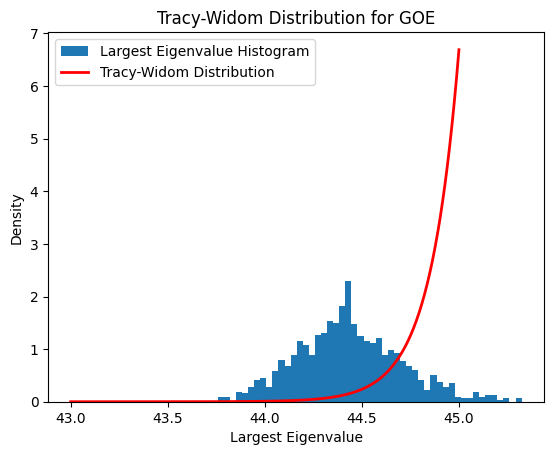

In [ ]:
def tracy_widom_pdf(x):
    mu = -1.20653
    sigma = 1.26806
    a = (x - mu) / sigma
    return np.exp(-2/3 * a**3 - 2**(1/3) * a) / (np.sqrt(2 * np.pi) * sigma)

# Plot the histogram of largest eigenvalues
plt.hist(largest_eigenvalues, bins=50, density=True, label='Largest Eigenvalue Histogram')

# Calculate and plot Tracy-Widom distribution using scipy.special
x = np.linspace(43,45, 1000)
y = tracy_widom_distribution(x)

# Normalize the Tracy-Widom distribution
y /= np.trapz(y, x)
plt.plot(x, y, 'r-', lw=2, label='Tracy-Widom Distribution')

plt.xlabel('Largest Eigenvalue')
plt.ylabel('Density')
plt.title('Tracy-Widom Distribution for GOE')
plt.legend()
plt.show()

### Problem 3. KL Divergence (2 points)

Kullback–Leibler divergence DKL is defined for two density functions $p(x)$ and $q(x)$ as $DKL(p||q) = \int^∞_{−∞}{p(x)\log{(\frac{p(x)}{q(x)}})}dx$.

Using Kullback–Leibler divergence check that the sum of i.i.d. uniform random variables converges to a normal distribution $N (0, 1)$. At what point, in terms of the number of summands N and DKL, does this sum become indistinguishable from sample from a Gaussian distribution?
1. Write a function that produces a sum $Z = X_1 + ... + X_N$ , where $X_i ∈ \text{Uniform}[0, 1]$. Normalize the sum according to the statement of the Central Limit Theorem.
2. Plot a PDF of Z and ensure it becomes closer to normal when N increases.
3. Compute the $DKL(P||Q)$ where $P$ is the $PDF$ of $Z$ and $Q$ is the density function of the normal distribution for each number of summands $N$.
4. Plot $DKL(P||Q)$ values for $N = 1, ... 25$.
Hint: the PDF of the sum could be obtained through the convolution, or, easier, as values of the histogram if a sample for $X_i$ is big enough.

For $P: X∼U([a_1,b_1]) \; ; \; Q: X \sim U([a_2,b_2])$  Then Kullback-divergebce of $P$ and $Q$ is given by:

$$KL(P||Q)=\int_{-∞}^∞ p(x)\ln{\frac{p(x)}{q(x)}}dx =\int_{-∞}^∞U([a_1,b_1])\ln{\frac{U([a_1,b_1])}{U([a_2,b_2])}}dx =\left<\ln{\frac{U([a_1,b_1])}{U([a_2,b_2])}} \right>_{p(x)}$$

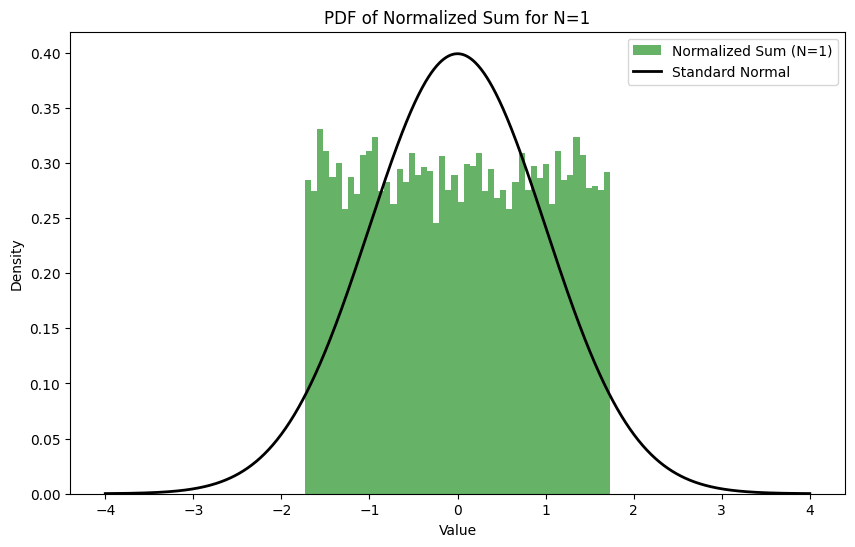

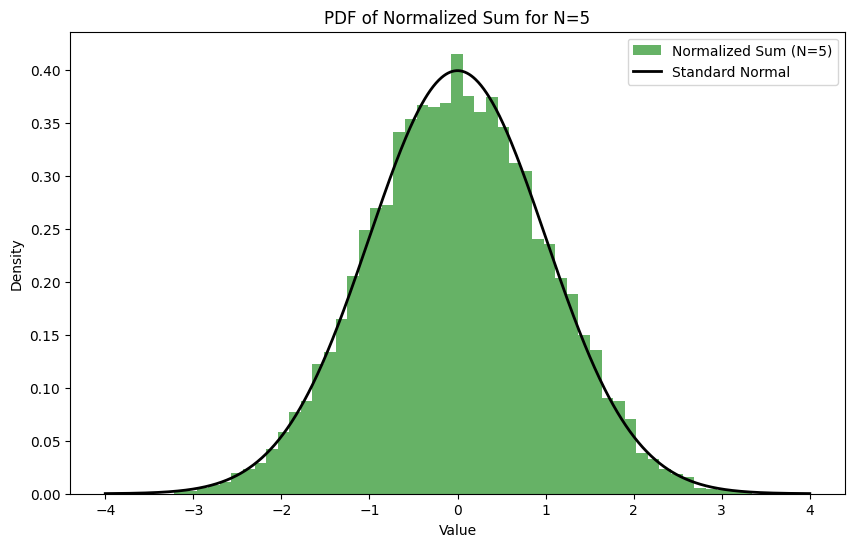

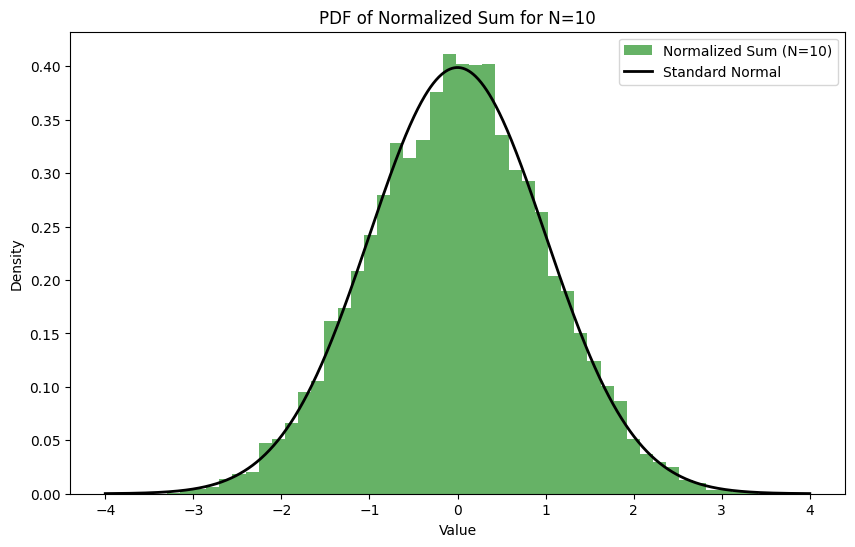

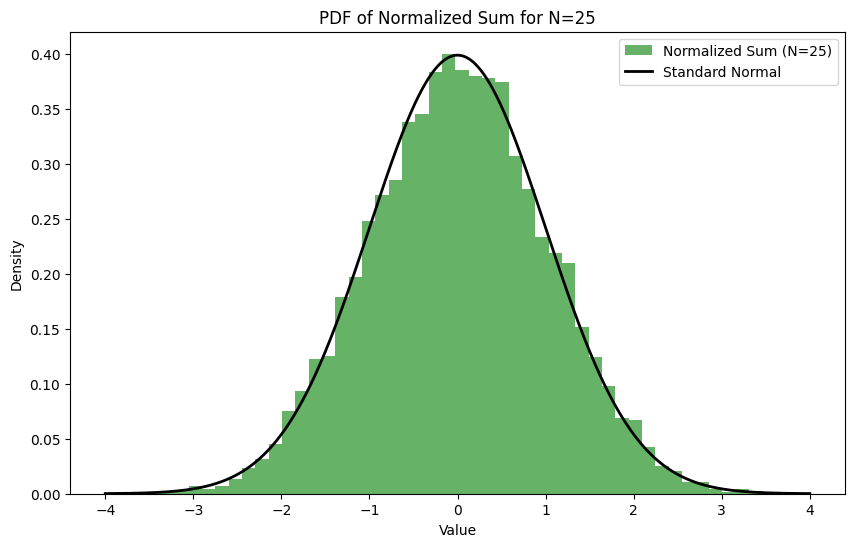

<ipython-input-8-2fbb17088404>:29: RuntimeWarning: invalid value encountered in scalar divide
  integrand = lambda x: p(x) * np.log(p(x) / q(x))
<ipython-input-8-2fbb17088404>:29: RuntimeWarning: divide by zero encountered in log
  integrand = lambda x: p(x) * np.log(p(x) / q(x))
<ipython-input-8-2fbb17088404>:29: RuntimeWarning: invalid value encountered in scalar multiply
  integrand = lambda x: p(x) * np.log(p(x) / q(x))
<ipython-input-8-2fbb17088404>:30: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return quad(integrand, -np.inf, np.inf)[0]
<ipython-input-8-2fbb17088404>:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, disconti

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import quad

# Step 1: Generate the sum and normalize
def generate_normalized_sum(N, sample_size=10000):
    X = uniform.rvs(loc=0, scale=1, size=(sample_size, N))
    Z = np.sum(X, axis=1)
    mu = 0.5
    sigma = np.sqrt(1/12)
    Z_normalized = (Z - N * mu) / (sigma * np.sqrt(N))
    return Z_normalized

# Step 2: Plot the PDF of the normalized sum
def plot_pdf(Z_normalized, N):
    plt.figure(figsize=(10, 6))
    plt.hist(Z_normalized, bins=50, density=True, alpha=0.6, color='g', label=f'Normalized Sum (N={N})')
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x), 'k', linewidth=2, label='Standard Normal')
    plt.title(f'PDF of Normalized Sum for N={N}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Step 3: Compute the KL Divergence
def kl_divergence(p, q, x):
    integrand = lambda x: p(x) * np.log(p(x) / q(x))
    return quad(integrand, -np.inf, np.inf)[0]

def compute_kl_divergence(Z_normalized, N):
    hist, bin_edges = np.histogram(Z_normalized, bins=50, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    p = lambda x: np.interp(x, bin_centers, hist, left=0, right=0)
    q = norm.pdf
    return kl_divergence(p, q, bin_centers)

# Step 4: Plot the KL Divergence values
def plot_kl_divergence():
    kl_values = []
    for N in range(1, 26):
        Z_normalized = generate_normalized_sum(N)
        kl_value = compute_kl_divergence(Z_normalized, N)
        kl_values.append(kl_value)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 26), kl_values, marker='o')
    plt.title('KL Divergence vs Number of Summands N')
    plt.xlabel('Number of Summands N')
    plt.ylabel('KL Divergence')
    plt.grid(True)
    plt.show()

# Main function to run the steps
def main():
    for N in [1, 5, 10, 25]:
        Z_normalized = generate_normalized_sum(N)
        plot_pdf(Z_normalized, N)
    plot_kl_divergence()

if __name__ == "__main__":
    main()

### Problem 4 Markov chains (3 points)

I have 4 sun glasses, some at home, some in the office. I keep moving between home and office. I take glasses with me only if it is sunny. If it is not sunny I leave the glasses behind (at home or in
the office). It may happen that all glasses are in one place, I am at the other, sun starts shining and
I must leave, so I will suffer.
1. If the probability of sunny weather is p, what is the probability that I will suffer from the sun?
2. Current estimates show that p = 0.6 in Sochi. How many sun glasses should I have so that, if I
follow the strategy above, the probability of my suffering is less than 0.1?


1. To find the probability of suffering from the sun.  
Let's denote:  
$p$: Probablilty of sunny weather.  
Consider the Markov Chain taking values in the sets $S=\{0,1,2,3,4\}$ which represents the numbers of sunglasses in my place.  
Let $i\in \{1,2,3,4\}$

If there are i sunglasse at my place $(I)$( home or office), then there are $4-i$ sunglasses at the other place $(II)$. If it is sunny then I take one of my sunglasses and go to the other place $(II)$ where there are $4-i$ sunglasses so I will have $4-i+1$ sunglasses after it at the other place.  



If it is not sunny then I leave all my $i$ sunglasses at $(I)$ and go to $(II)$ and I will have $4-i$ sunglasses after it.  Hence :
$$p_{i,4-i+1}=p \; ;\; p_{i,4-i}=1-p$$
If there are no sunglasses at $(I)$, then all the sunglasses are at $(II)$. $p_{0,4}=1$ since I will suffer really bad in case of sunny weather.  
 $\pi$ :
$$p_{0,4}=1 ; p_{4,0}=q ; p_{1,4}=p; p_{4,1}=p ; p_{2,3}=p ; p_{3,2}=p ; p_{1,3}=1-p=p_{3,1}; p_{2,2}=1-p  $$

To find the stationnary distribution $\pi : \pi(0)=\pi(4)q ; \pi(2)=\pi(3)=\pi(1)=\pi(4)$. $\pi(1)+...+\pi(4)=1 ⇒ \pi(4)q+4\pi(4)=1$. HEnce $\pi(4)=\frac{1}{q+4}$ . Also we have $\pi(4)=\pi(3)=\pi(2)=\pi(1)=\frac{1}{5-p}, \pi(0)=\frac{1-p}{5-p}$.  
I get upset if I am in $(I)$ but the all 4 sunglasses are in $(II)$, i.e. state $0$. The probability I am in above case is $\pi(0)$. The probability that it will be sunny is $p$.  
$P(\text{suffer from sun})=\pi(0)p=\frac{p(1-p)}{5-p}$  

For if $p=0.6$, then $P(\text{suffer from sun})=3/55 ≈ 5.45%$.  

Let $n$ be the number of sunglasses that I need. So by using the above reasoning : $\pi(0)=(1-p)\pi(n) ; \pi(1)=...=\pi(n)$. So after knowing that $\pi(0)+...+\pi(n)=1 \Rightarrow \pi(n)=\frac{1}{1-p+n}$. Hence $\pi(n)=...=\pi(1)=\frac{1}{1-p+n} , \pi(0)=\frac{1-p}{1-p+n}$.     
$P(\text{suffer})=p\pi(0)=\frac{p-p^2}{1-p+n}$



$$P(\text{suffer})<0.01 ⇒ \frac{p-p^2}{1-p+n}<0.01$$
$$n>\frac{p-p^2}{0.01}-1+p≈23.6$$
So I need 24 or more umbrella.

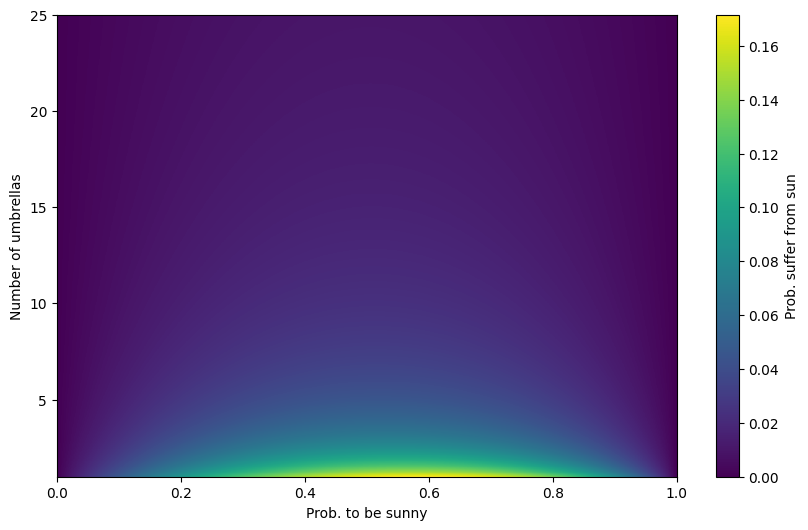

In [7]:
import numpy as np
import matplotlib.pyplot as plt
n_values=np.linspace(1,25,1000)
p_values=np.linspace(0,1,1000)
P,N=np.meshgrid(p_values,n_values)
Z=(1-P)*P/(1-P+N)

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(P, N, Z, shading='auto', cmap='viridis')
plt.colorbar(label='Prob. suffer from sun')
plt.xlabel('Prob. to be sunny')
plt.ylabel('Number of umbrellas')
plt.show()